In [7]:
!pip install colorama

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings
warnings.filterwarnings('ignore')

np.random.seed(7)

In [9]:
df = pd.read_csv("aquifers_fe.csv")
df.head()

,Date,Mean_Rainfall,Depth_to_Groundwater_LT2,Depth_to_Groundwater_SAL,Depth_to_Groundwater_PAG,Depth_to_Groundwater_CoS,Mean_Temp,Actual_Volume,Actual_Hydrometry
0,1998-03-05,0.241111,-14.4808,-6.0104,-1.9866,-7.2880,0.0000,-8456.579933,0.319444
1,1998-03-06,3.830000,-14.4732,-6.1017,-2.0239,-7.6134,2.5125,-8072.702231,0.282222
2,1998-03-07,3.425556,-14.4374,-6.0149,-2.1099,-7.3187,4.8000,-7559.036653,0.215000
3,1998-03-08,2.110000,-14.4984,-5.9993,-2.0748,-7.1760,6.3125,-7534.420794,0.223333
4,1998-03-09,2.191111,-14.4967,-6.0320,-2.0989,-7.3200,6.0625,-7529.258569,0.230556


In [10]:
targets = ['Depth_to_Groundwater_LT2','Depth_to_Groundwater_SAL','Depth_to_Groundwater_CoS']
features = ['Mean_Rainfall','Mean_Temp','Actual_Volume','Actual_Hydrometry']
df.head()

,Date,Mean_Rainfall,Depth_to_Groundwater_LT2,Depth_to_Groundwater_SAL,Depth_to_Groundwater_PAG,Depth_to_Groundwater_CoS,Mean_Temp,Actual_Volume,Actual_Hydrometry
0,1998-03-05,0.241111,-14.4808,-6.0104,-1.9866,-7.2880,0.0000,-8456.579933,0.319444
1,1998-03-06,3.830000,-14.4732,-6.1017,-2.0239,-7.6134,2.5125,-8072.702231,0.282222
2,1998-03-07,3.425556,-14.4374,-6.0149,-2.1099,-7.3187,4.8000,-7559.036653,0.215000
3,1998-03-08,2.110000,-14.4984,-5.9993,-2.0748,-7.1760,6.3125,-7534.420794,0.223333
4,1998-03-09,2.191111,-14.4967,-6.0320,-2.0989,-7.3200,6.0625,-7529.258569,0.230556


In [11]:
from datetime import datetime, date

# Assuming the 'Date' column is in the format 'YYYY-MM-DD'
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df.head().style.set_properties(subset=['Date'], **{'background-color': 'dodgerblue'})


,Date,Mean_Rainfall,Depth_to_Groundwater_LT2,Depth_to_Groundwater_SAL,Depth_to_Groundwater_PAG,Depth_to_Groundwater_CoS,Mean_Temp,Actual_Volume,Actual_Hydrometry
0,1998-03-05 00:00:00,0.241111,-14.480800,-6.010400,-1.986600,-7.288000,0.000000,-8456.579933,0.319444
1,1998-03-06 00:00:00,3.830000,-14.473200,-6.101700,-2.023900,-7.613400,2.512500,-8072.702231,0.282222
2,1998-03-07 00:00:00,3.425556,-14.437400,-6.014900,-2.109900,-7.318700,4.800000,-7559.036653,0.215000
3,1998-03-08 00:00:00,2.110000,-14.498400,-5.999300,-2.074800,-7.176000,6.312500,-7534.420794,0.223333
4,1998-03-09 00:00:00,2.191111,-14.496700,-6.032000,-2.098900,-7.320000,6.062500,-7529.258569,0.230556


In [12]:
df = df.sort_values(by='Date')

# Check time intervals
df['delta'] = df['Date'] - df['Date'].shift(1)

df[['Date', 'delta']].head()

,Date,delta
0,1998-03-05,NaT
1,1998-03-06,1 days
2,1998-03-07,1 days
3,1998-03-08,1 days
4,1998-03-09,1 days


In [13]:
df['delta'].sum(), df['delta'].count()

(Timedelta('4498 days 00:00:00'), 4498)

In [14]:
df = df.drop('delta', axis=1)
df.isna().sum()

Date                        0
Mean_Rainfall               0
Depth_to_Groundwater_LT2    0
Depth_to_Groundwater_SAL    0
Depth_to_Groundwater_PAG    0
Depth_to_Groundwater_CoS    0
Mean_Temp                   0
Actual_Volume               0
Actual_Hydrometry           0
dtype: int64

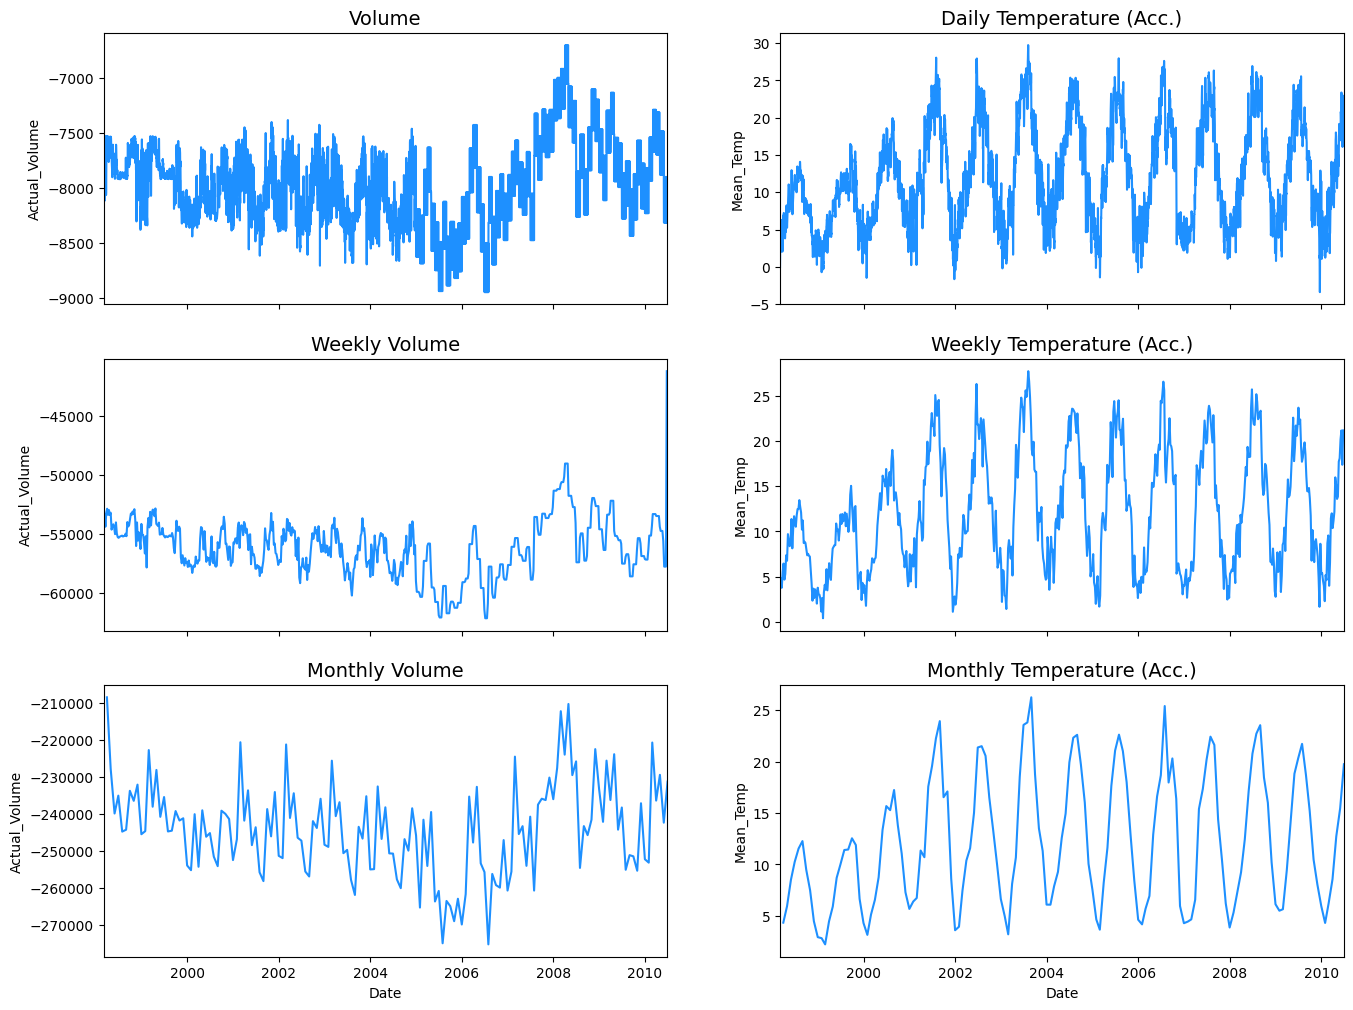

In [15]:
from datetime import datetime, date

fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16, 12))

# Plot 1: Original Daily Volume
sns.lineplot(x='Date', y='Actual_Volume', data=df, color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Volume', fontsize=14)

# Plot 2: Weekly Resampled Volume
resampled_df = df[['Date', 'Actual_Volume']].resample('7D', on='Date').sum().reset_index(drop=False)
sns.lineplot(x='Date', y='Actual_Volume', data=resampled_df, color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Volume', fontsize=14)

# Plot 3: Monthly Resampled Volume
resampled_df = df[['Date', 'Actual_Volume']].resample('M', on='Date').sum().reset_index(drop=False)
sns.lineplot(x='Date', y='Actual_Volume', data=resampled_df, color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Volume', fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

# Plot 4: Original Daily Temperature
sns.lineplot(x='Date', y='Mean_Temp', data=df, color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

# Plot 5: Weekly Resampled Temperature
resampled_df = df[['Date', 'Mean_Temp']].resample('7D', on='Date').mean().reset_index(drop=False)
sns.lineplot(x='Date', y='Mean_Temp', data=resampled_df, color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Acc.)', fontsize=14)

# Plot 6: Monthly Resampled Temperature
resampled_df = df[['Date', 'Mean_Temp']].resample('M', on='Date').mean().reset_index(drop=False)
sns.lineplot(x='Date', y='Mean_Temp', data=resampled_df, color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

for i in range(3):
    ax[i, 1].set_xlim([date(1998, 3, 5), date(2010, 6, 28)])

plt.show()


In [16]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller

result = adfuller(df[['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS']].values.flatten())

result

(-4.5056068005192715,
 0.00019210333987472607,
 41,
 13455,
 {'1%': -3.4308361053886824,
  '5%': -2.86175483574134,
  '10%': -2.566884352193978},
 4427.992941074022)

In [17]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller

result = adfuller(df[['Depth_to_Groundwater_LT2']].values.flatten())

result

(-4.298652718983031,
 0.00044660475955020194,
 30,
 4468,
 {'1%': -3.431814427241995,
  '5%': -2.8621871015293827,
  '10%': -2.567114455839957},
 -8387.912877870529)

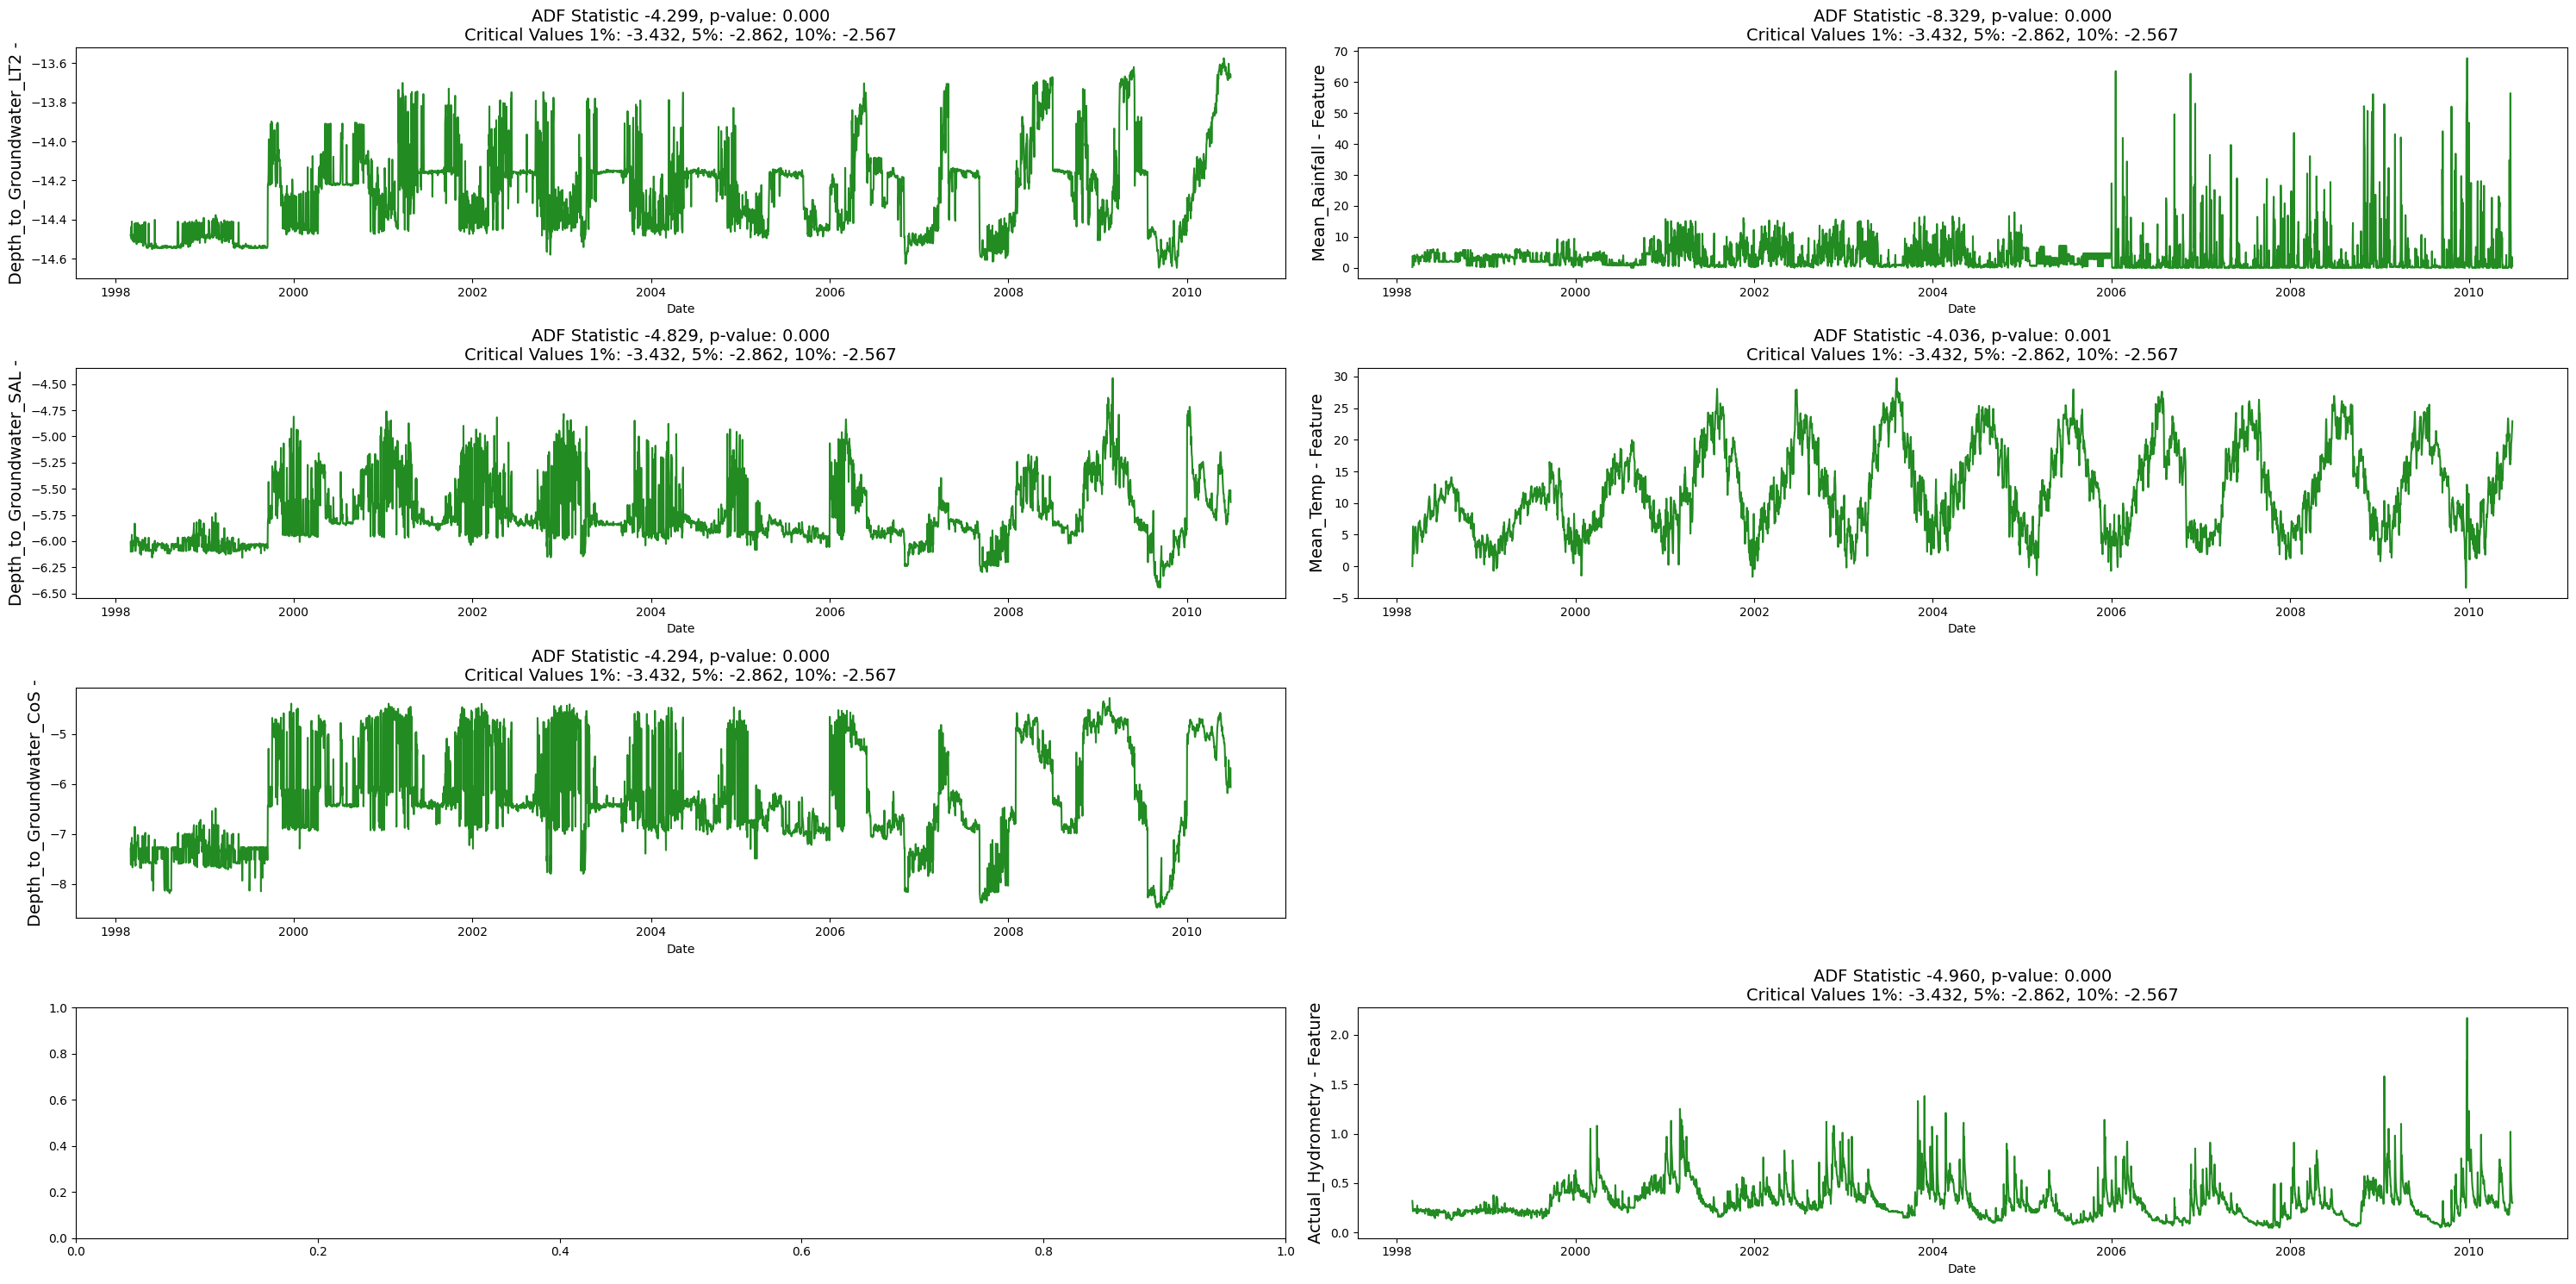

In [18]:
f, ax = plt.subplots(nrows=4, ncols=2, figsize=(30, 15))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen'
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['Date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

for i, target in enumerate(targets):
    visualize_adfuller_results(df[target].values, f'{target} -', ax[i, 0])

for i, feature in enumerate(features):
    visualize_adfuller_results(df[feature].values, f'{feature} - Feature', ax[i, 1])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()


<Axes: xlabel='Depth_to_Groundwater_CoS_log', ylabel='Density'>

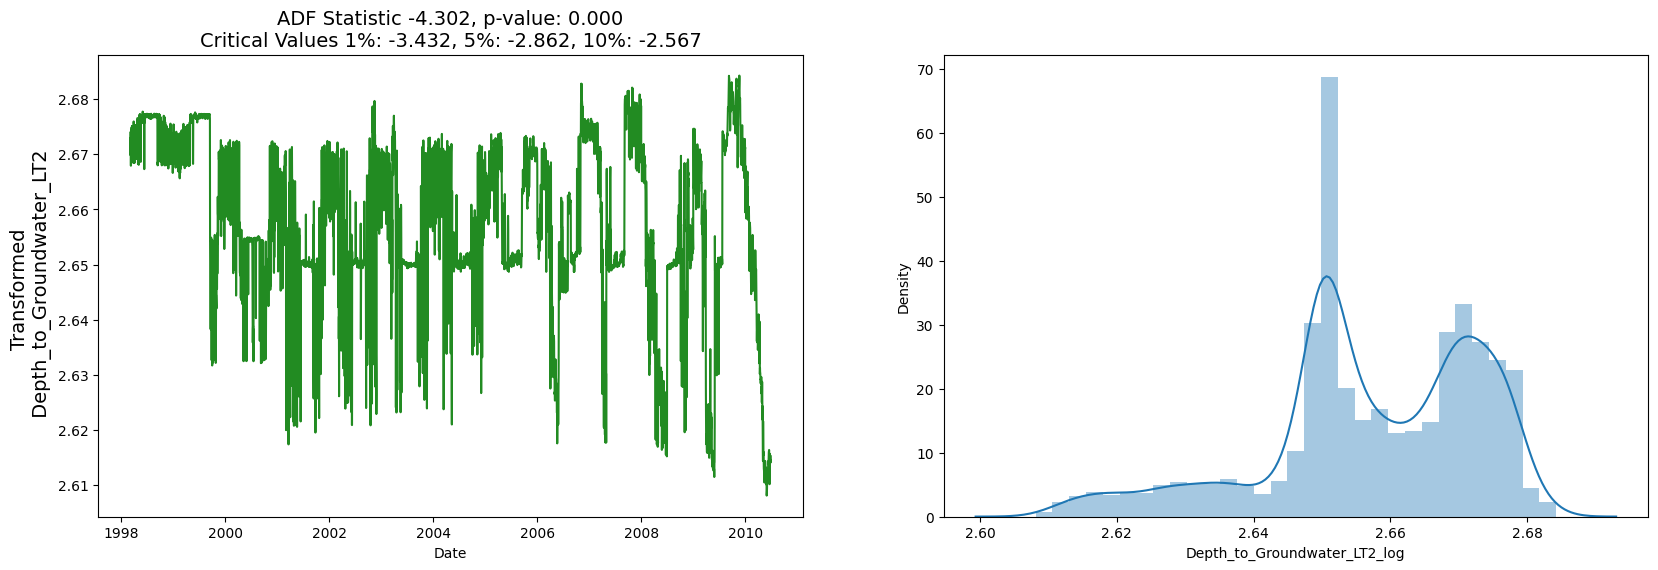

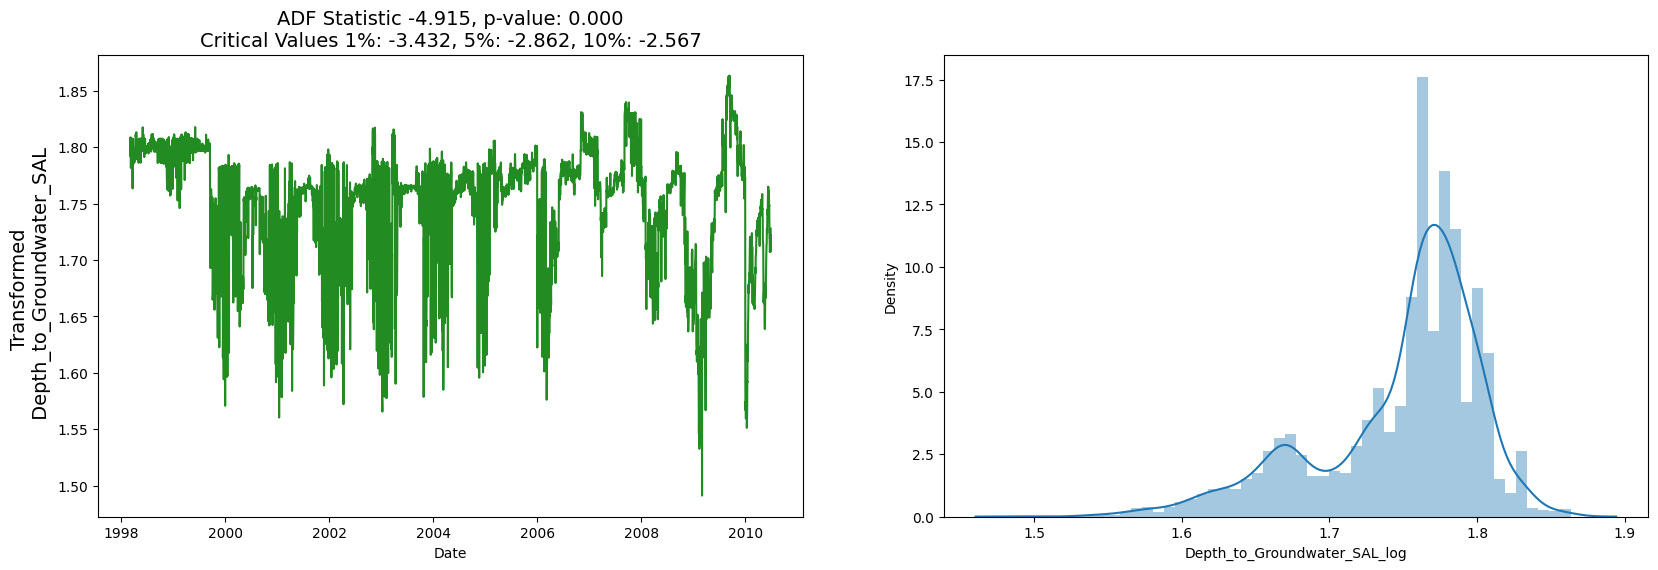

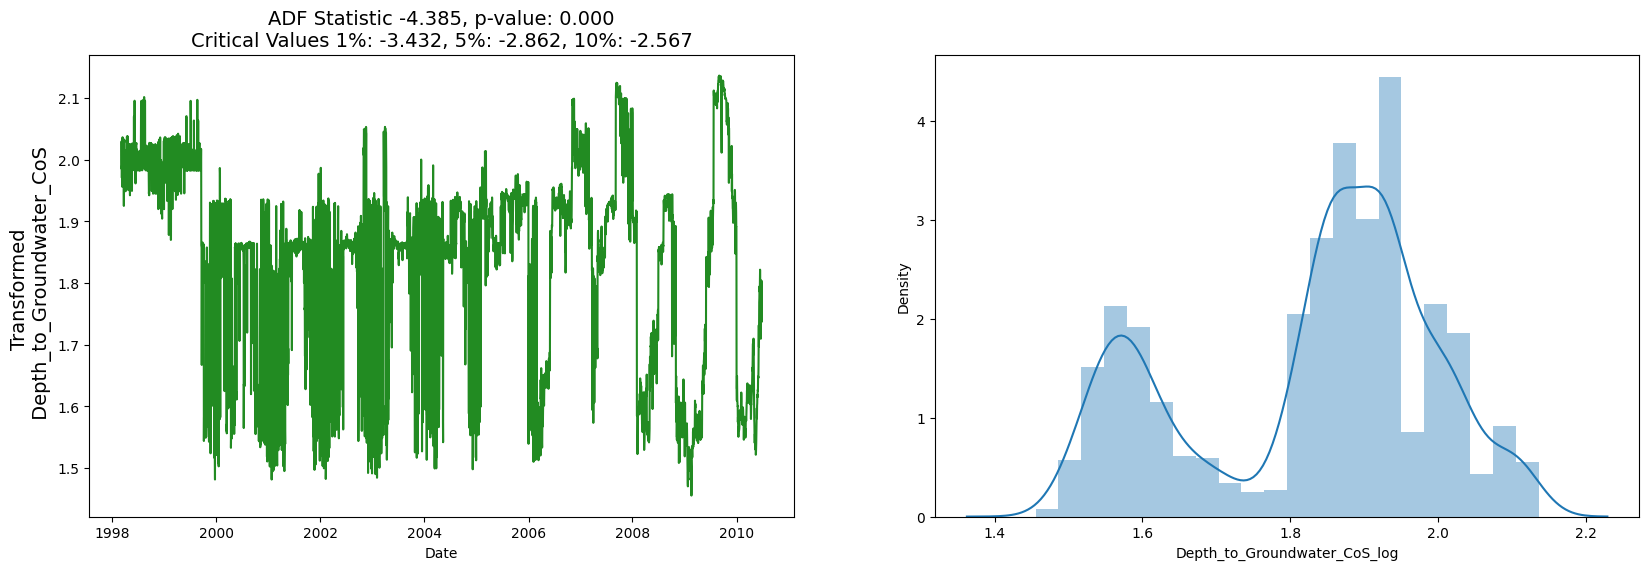

In [19]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['Depth_to_Groundwater_LT2_log'] = np.log(abs(df['Depth_to_Groundwater_LT2']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['Depth_to_Groundwater_LT2_log'], 'Transformed \n Depth_to_Groundwater_LT2', ax[0])

sns.distplot(df['Depth_to_Groundwater_LT2_log'], ax=ax[1])

# For Depth_to_Groundwater_SAL
df['Depth_to_Groundwater_SAL_log'] = np.log(abs(df['Depth_to_Groundwater_SAL']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['Depth_to_Groundwater_SAL_log'], 'Transformed \n Depth_to_Groundwater_SAL', ax[0])
sns.distplot(df['Depth_to_Groundwater_SAL_log'], ax=ax[1])

# For Depth_to_Groundwater_CoS
df['Depth_to_Groundwater_CoS_log'] = np.log(abs(df['Depth_to_Groundwater_CoS']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['Depth_to_Groundwater_CoS_log'], 'Transformed \n Depth_to_Groundwater_CoS', ax[0])
sns.distplot(df['Depth_to_Groundwater_CoS_log'], ax=ax[1])


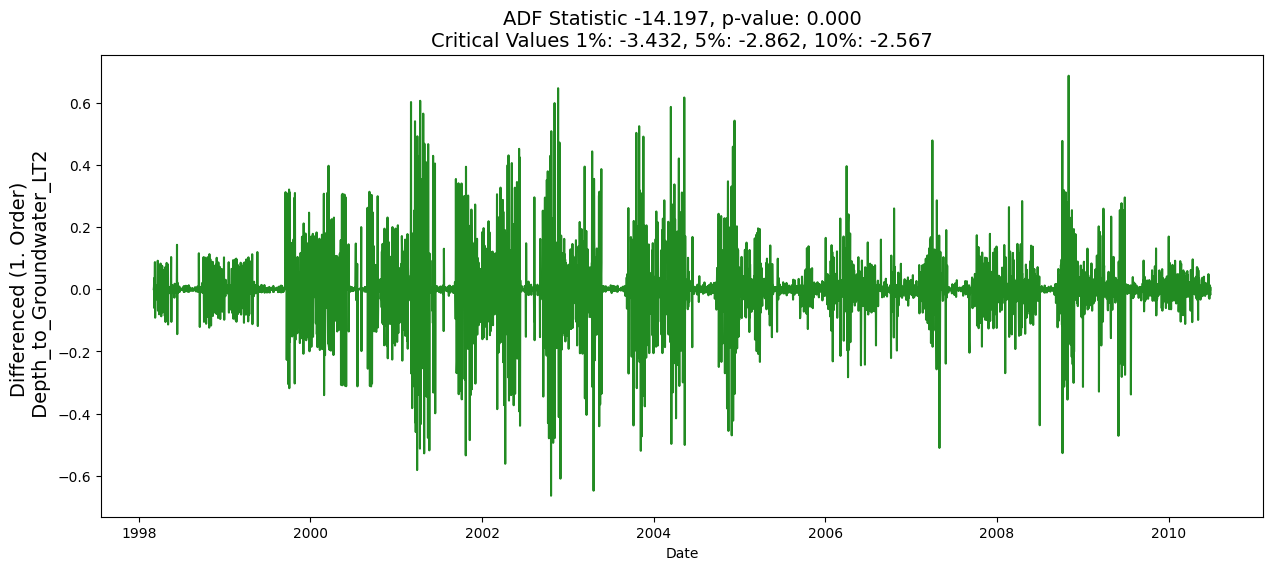

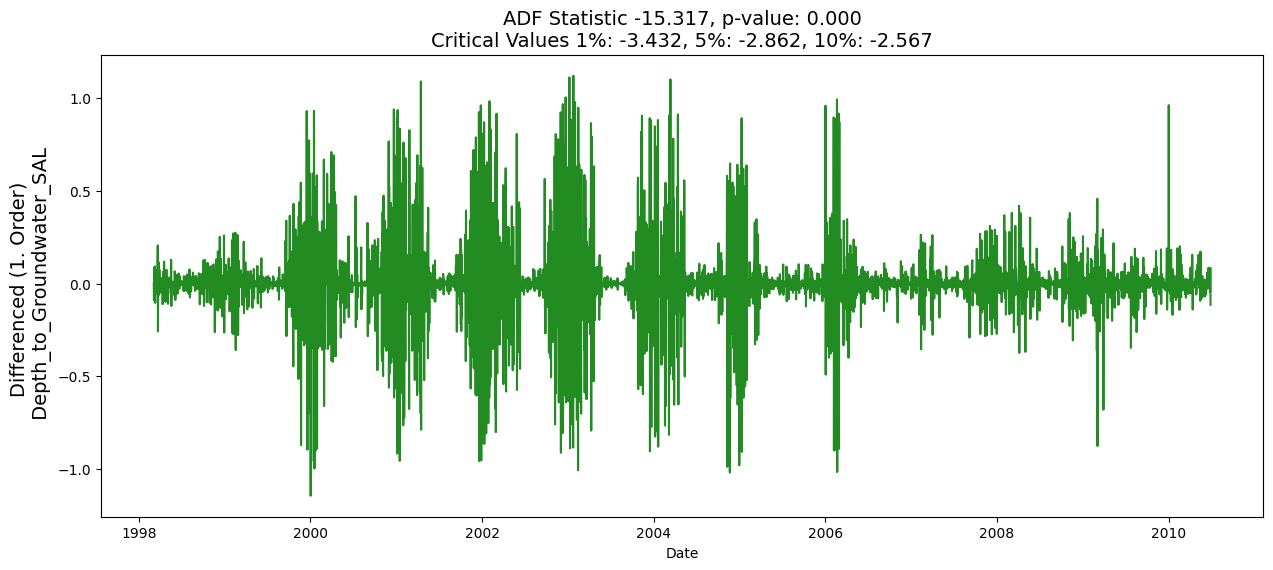

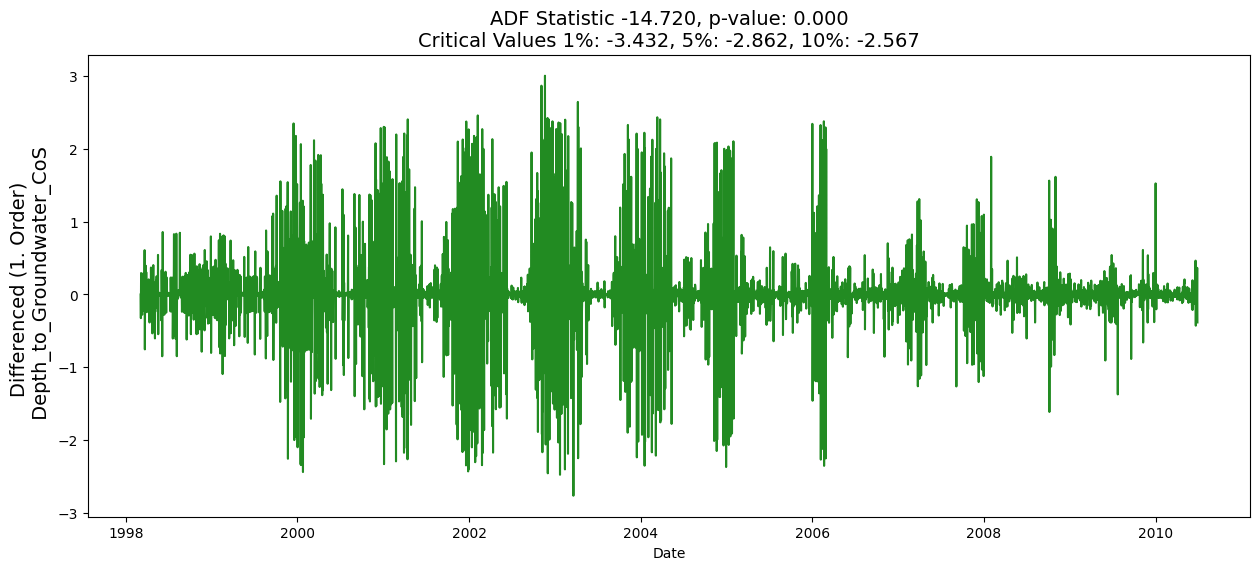

In [20]:
# First Order Differencing
ts_diff = np.diff(df['Depth_to_Groundwater_LT2'])
df['Depth_to_Groundwater_LT2_diff_1'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['Depth_to_Groundwater_LT2_diff_1'], 'Differenced (1. Order) \n Depth_to_Groundwater_LT2', ax)
# First Order Differencing for Depth_to_Groundwater_SAL
ts_diff_sal = np.diff(df['Depth_to_Groundwater_SAL'])
df['Depth_to_Groundwater_SAL_diff_1'] = np.append([0], ts_diff_sal)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['Depth_to_Groundwater_SAL_diff_1'], 'Differenced (1. Order) \n Depth_to_Groundwater_SAL', ax)

# First Order Differencing for Depth_to_Groundwater_CoS
ts_diff_cos = np.diff(df['Depth_to_Groundwater_CoS'])
df['Depth_to_Groundwater_CoS_diff_1'] = np.append([0], ts_diff_cos)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['Depth_to_Groundwater_CoS_diff_1'], 'Differenced (1. Order) \n Depth_to_Groundwater_CoS', ax)


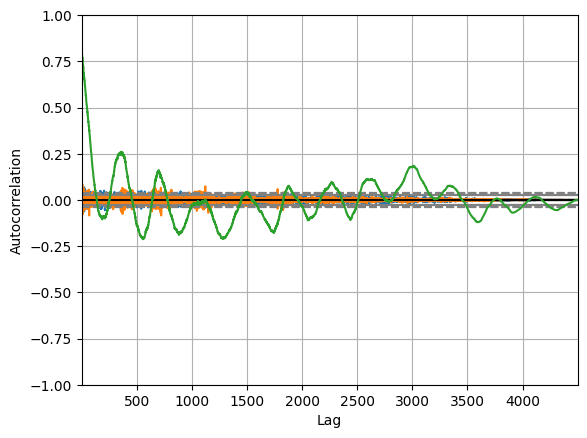

In [21]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Depth_to_Groundwater_LT2_diff_1'])
autocorrelation_plot(df['Depth_to_Groundwater_SAL_diff_1'])
autocorrelation_plot(df['Depth_to_Groundwater_CoS_diff_1'])
plt.show()

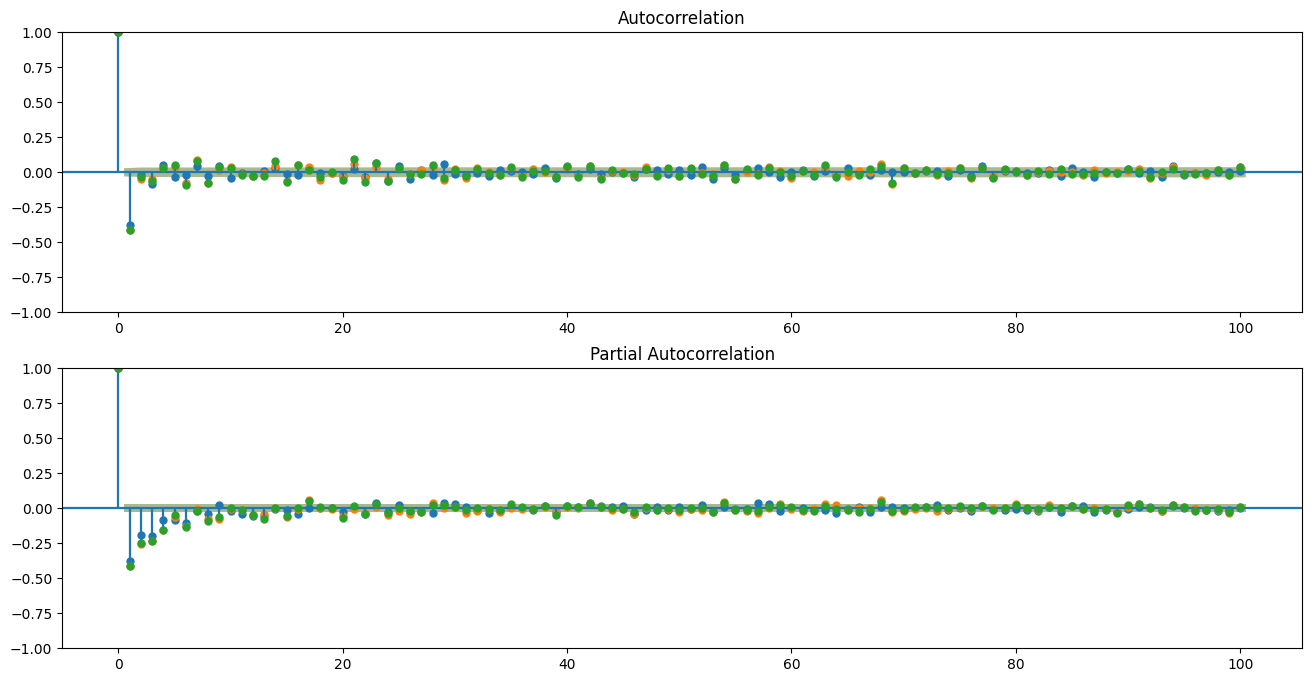

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['Depth_to_Groundwater_LT2_diff_1'], lags=100, ax=ax[0])
plot_pacf(df['Depth_to_Groundwater_LT2_diff_1'], lags=100, ax=ax[1])

plot_acf(df['Depth_to_Groundwater_SAL_diff_1'], lags=100, ax=ax[0])
plot_pacf(df['Depth_to_Groundwater_SAL_diff_1'], lags=100, ax=ax[1])

plot_acf(df['Depth_to_Groundwater_CoS_diff_1'], lags=100, ax=ax[0])
plot_pacf(df['Depth_to_Groundwater_CoS_diff_1'], lags=100, ax=ax[1])

plt.show()

In [38]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df['Date']
y1 = df['Depth_to_Groundwater_LT2_diff_1']
y2 = df['Depth_to_Groundwater_SAL_diff_1']
y3 = df['Depth_to_Groundwater_CoS_diff_1']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

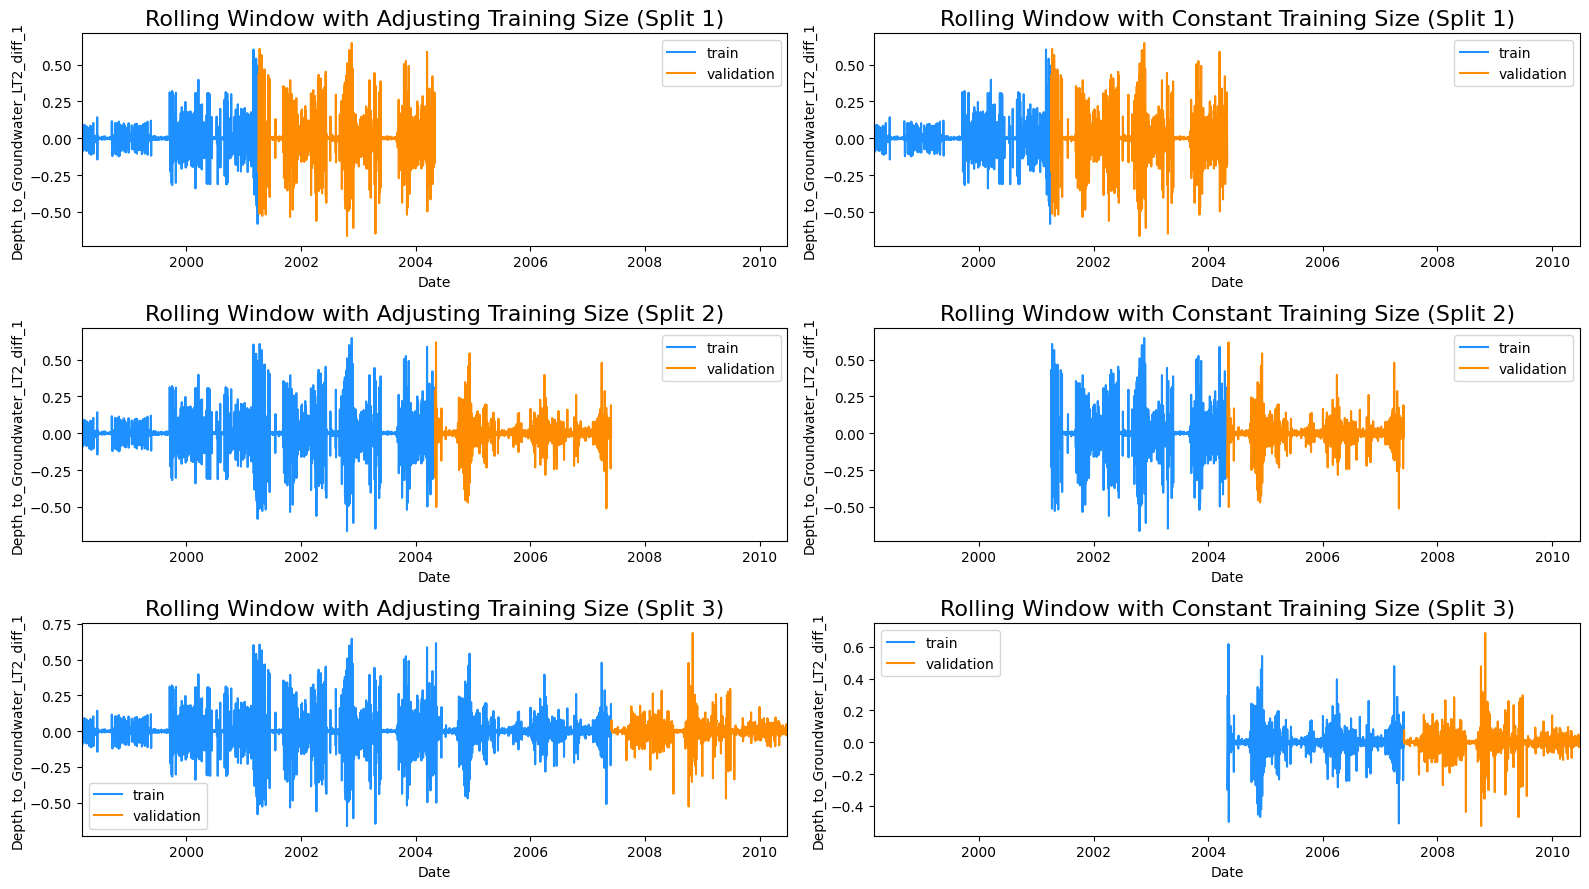

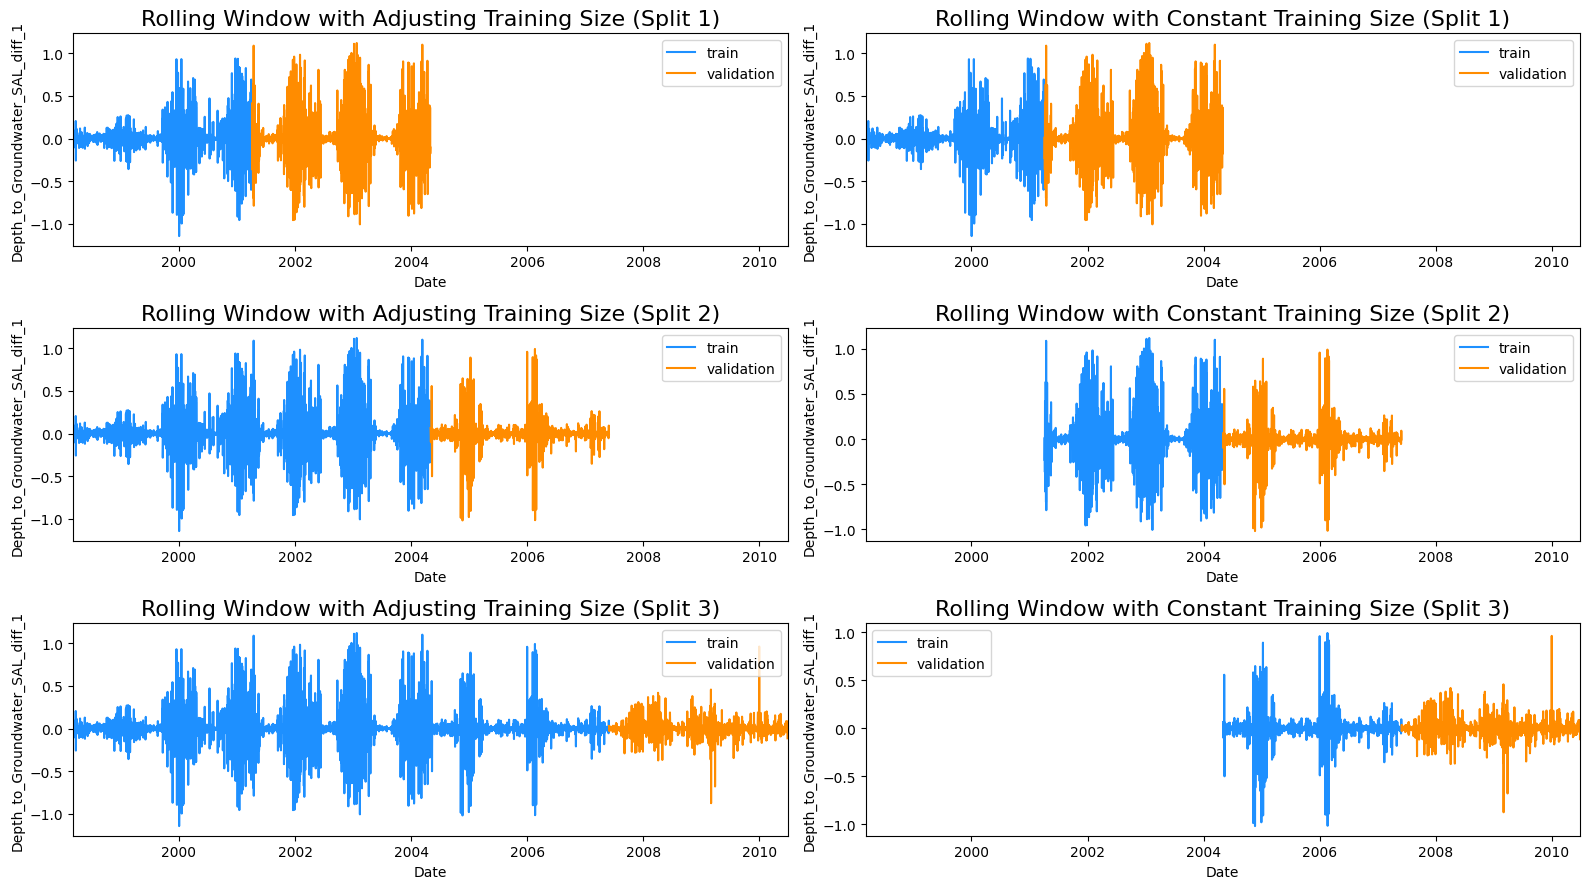

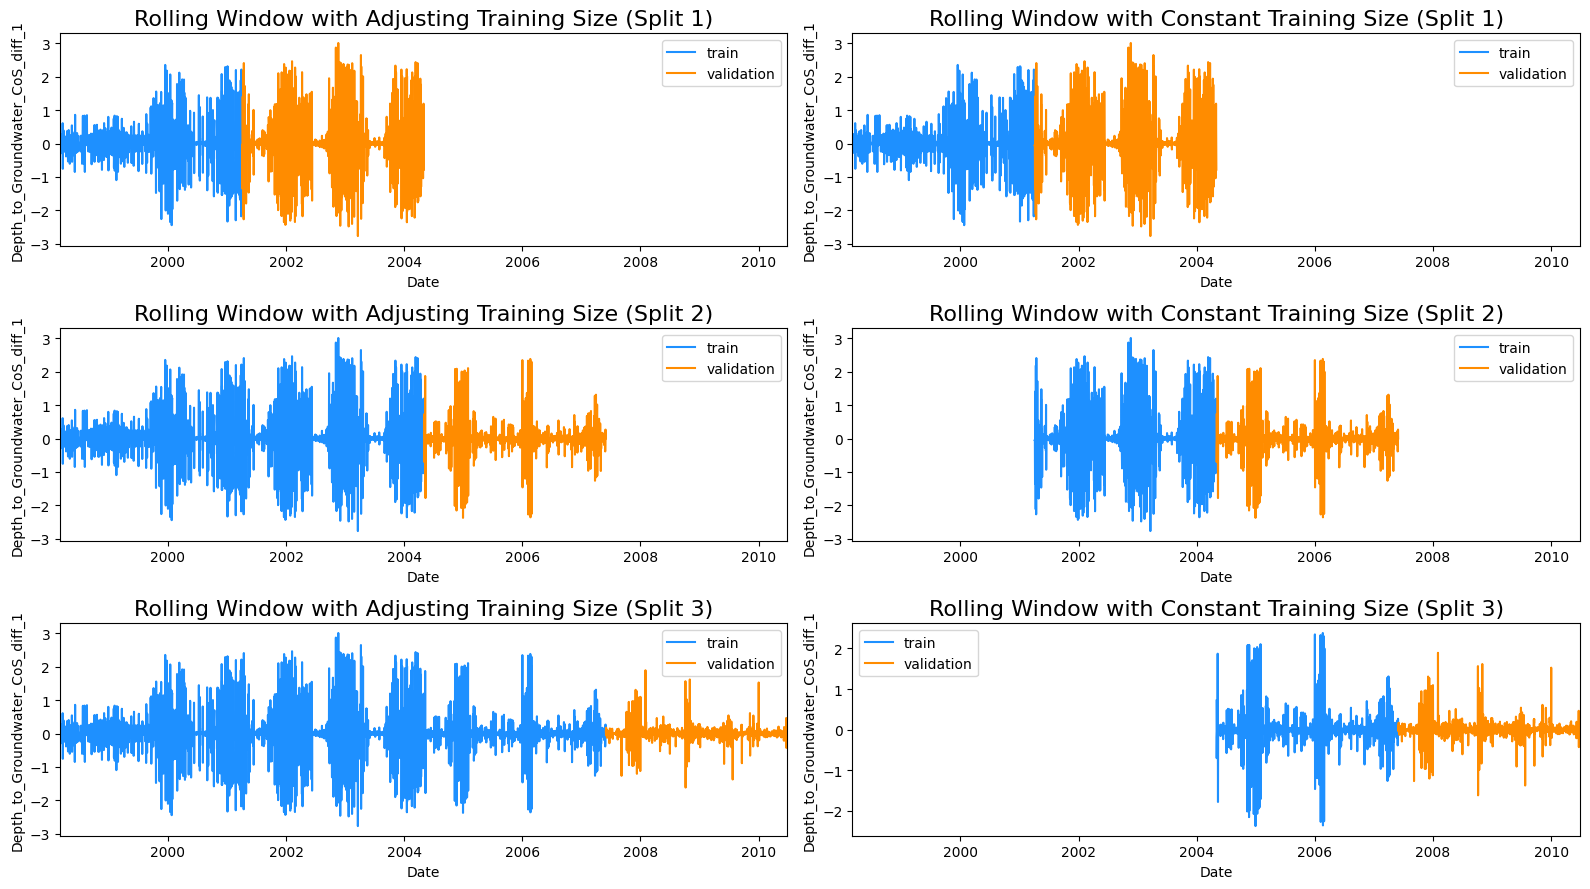

In [39]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y1[train_index], y1[valid_index]

    sns.lineplot(
        x=X_train,
        y=y_train,
        ax=ax[i,0],
        color='dodgerblue',
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))],
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))],
        ax=ax[i,1],
        color='dodgerblue',
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(1998, 3, 5), date(2010, 6, 28)])
    ax[i, 1].set_xlim([date(1998, 3, 5), date(2010, 6, 28)])

plt.tight_layout()
plt.show()

f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y2[train_index], y2[valid_index]

    sns.lineplot(
        x=X_train,
        y=y_train,
        ax=ax[i,0],
        color='dodgerblue',
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))],
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))],
        ax=ax[i,1],
        color='dodgerblue',
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(1998, 3, 5), date(2010, 6, 28)])
    ax[i, 1].set_xlim([date(1998, 3, 5), date(2010, 6, 28)])

plt.tight_layout()
plt.show()

f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y3[train_index], y3[valid_index]

    sns.lineplot(
        x=X_train,
        y=y_train,
        ax=ax[i,0],
        color='dodgerblue',
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))],
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))],
        ax=ax[i,1],
        color='dodgerblue',
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(1998, 3, 5), date(2010, 6, 28)])
    ax[i, 1].set_xlim([date(1998, 3, 5), date(2010, 6, 28)])

plt.tight_layout()
plt.show()

In [25]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['Date', 'Depth_to_Groundwater_LT2']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

3824 675


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from prophet import Prophet


# Train the model
model = Prophet()
model.fit(train)

#x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod0au0n6/dvouvaya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod0au0n6/m9h0hv2e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27635', 'data', 'file=/tmp/tmpod0au0n6/dvouvaya.json', 'init=/tmp/tmpod0au0n6/m9h0hv2e.json', 'output', 'file=/tmp/tmpod0au0n6/prophet_modelyz_7jeb1/prophet_model-20240121150944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:09:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:09:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.25947843628551703


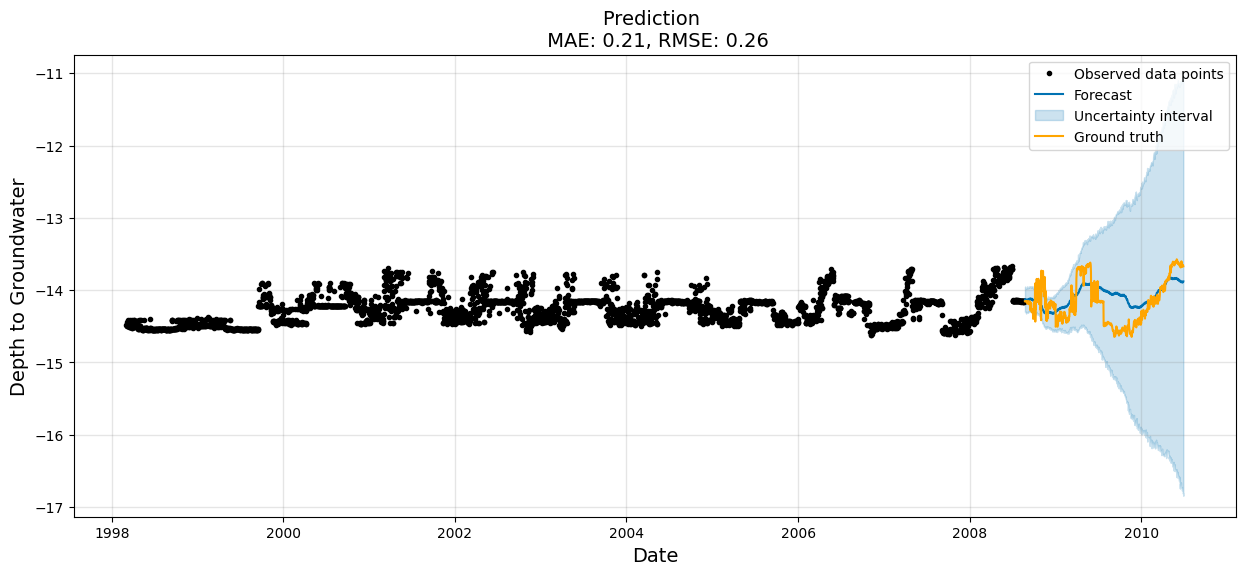

In [27]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

In [42]:
from prophet import Prophet

# Assuming df contains 'Date' and 'Depth_to_Groundwater_LT2' columns
# Create a univariate DataFrame
univariate_df1 = df[['Date', 'Depth_to_Groundwater_LT2']].copy()
univariate_df1.columns = ['ds', 'y']

# Train the model on the entire dataset
model = Prophet()
model.fit(univariate_df1)

# Make future DataFrame for predictions for the next 3 years
future_dates = pd.date_range(start='28/06/2010', periods=3*365, freq='D')
future_df = pd.DataFrame({'ds': future_dates})

# Predict on the future dates
future_predictions = model.predict(future_df)

# Display the predicted values as a DataFrame
print(future_predictions[['ds', 'yhat']].head())


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod0au0n6/zzbg_4zs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod0au0n6/ty_u5jzy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73730', 'data', 'file=/tmp/tmpod0au0n6/zzbg_4zs.json', 'init=/tmp/tmpod0au0n6/ty_u5jzy.json', 'output', 'file=/tmp/tmpod0au0n6/prophet_modeljattsugg/prophet_model-20240121152330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:23:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds       yhat
0 2010-06-28 -14.027833
1 2010-06-29 -14.036996
2 2010-06-30 -14.042784
3 2010-07-01 -14.044381
4 2010-07-02 -14.043654


In [48]:
from prophet import Prophet

# Assuming df contains 'Date' and 'Depth_to_Groundwater_LT2' columns
# Create a univariate DataFrame
univariate_df2 = df[['Date', 'Depth_to_Groundwater_SAL']].copy()

univariate_df2.columns = ['ds', 'y']

# Train the model on the entire dataset
model = Prophet()
model.fit(univariate_df2)

# Make future DataFrame for predictions for the next 3 years
future_dates = pd.date_range(start='28/06/2010', periods=3*365, freq='D')
future_df = pd.DataFrame({'ds': future_dates})

# Predict on the future dates
future_predictions = model.predict(future_df)

# Display the predicted values as a DataFrame
print(future_predictions[['ds', 'yhat']].head())


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod0au0n6/uhlgldpu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod0au0n6/rh_9jtt3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85497', 'data', 'file=/tmp/tmpod0au0n6/uhlgldpu.json', 'init=/tmp/tmpod0au0n6/rh_9jtt3.json', 'output', 'file=/tmp/tmpod0au0n6/prophet_model2oz6k7_7/prophet_model-20240121153241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:32:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:32:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat
0 2010-06-28 -5.725831
1 2010-06-29 -5.726266
2 2010-06-30 -5.720853
3 2010-07-01 -5.737055
4 2010-07-02 -5.718979


In [49]:
from prophet import Prophet

# Assuming df contains 'Date' and 'Depth_to_Groundwater_LT2' columns
# Create a univariate DataFrame
univariate_df3 = df[['Date', 'Depth_to_Groundwater_CoS']].copy()
univariate_df3.columns = ['ds', 'y']

# Train the model on the entire dataset
model = Prophet()
model.fit(univariate_df3)

# Make future DataFrame for predictions for the next 3 years
future_dates = pd.date_range(start='28/06/2010', periods=3*365, freq='D')
future_df = pd.DataFrame({'ds': future_dates})

# Predict on the future dates
future_predictions = model.predict(future_df)

# Display the predicted values as a DataFrame
print(future_predictions[['ds', 'yhat']].head())


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod0au0n6/zytyjeaw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod0au0n6/aa2zf2fz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57162', 'data', 'file=/tmp/tmpod0au0n6/zytyjeaw.json', 'init=/tmp/tmpod0au0n6/aa2zf2fz.json', 'output', 'file=/tmp/tmpod0au0n6/prophet_modelja57lmbt/prophet_model-20240121153254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:32:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:32:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat
0 2010-06-28 -6.023927
1 2010-06-29 -6.037920
2 2010-06-30 -6.027140
3 2010-07-01 -6.068334
4 2010-07-02 -6.015249


In [50]:
# Assuming df contains 'Date' and multiple 'Depth_to_Groundwater' columns
# Create a DataFrame to store predictions
combined_predictions = pd.DataFrame({'ds': future_dates})

# List of univariate columns
univariate_columns = ['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS']

# Iterate over each univariate column and concatenate predictions
for column in univariate_columns:
    # Create univariate DataFrame
    univariate_df = df[['Date', column]].copy()
    univariate_df.columns = ['ds', 'y']

    # Train the model on the entire dataset
    model = Prophet()
    model.fit(univariate_df)

    # Predict on the future dates
    future_predictions = model.predict(future_df)

    # Add predictions to the combined DataFrame
    combined_predictions[column] = future_predictions['yhat']

# Save the combined predictions to a CSV file
combined_predictions.to_csv('combined_predictions.csv', index=False)

# Display the combined predictions
print(combined_predictions.head())


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod0au0n6/orkqa5gw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod0au0n6/hkovn5tg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72076', 'data', 'file=/tmp/tmpod0au0n6/orkqa5gw.json', 'init=/tmp/tmpod0au0n6/hkovn5tg.json', 'output', 'file=/tmp/tmpod0au0n6/prophet_modelxbzcuh95/prophet_model-20240121153311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:33:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:33:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod

          ds  Depth_to_Groundwater_LT2  Depth_to_Groundwater_SAL  \
0 2010-06-28                -14.027833                 -5.725831   
1 2010-06-29                -14.036996                 -5.726266   
2 2010-06-30                -14.042784                 -5.720853   
3 2010-07-01                -14.044381                 -5.737055   
4 2010-07-02                -14.043654                 -5.718979   

   Depth_to_Groundwater_CoS  
0                 -6.023927  
1                 -6.037920  
2                 -6.027140  
3                 -6.068334  
4                 -6.015249  


,ds,yhat
0,2010-06-28,-0.099364
1,2010-06-29,-0.015775
2,2010-06-30,0.009052
3,2010-07-01,-0.042896
4,2010-07-02,0.051340
...,...,...
1090,2013-06-22,-0.052445
1091,2013-06-23,0.124192
1092,2013-06-24,-0.103664
1093,2013-06-25,-0.019494


In [30]:
import statsmodels.api as sm

# Fit model
model = sm.tsa.ARIMA(y_train, order=(1, 2, 3))
model_fit = model.fit()

# Prediction with ARIMA
y_pred = model_fit.forecast(675)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

RMSE: 0.30339909350278055


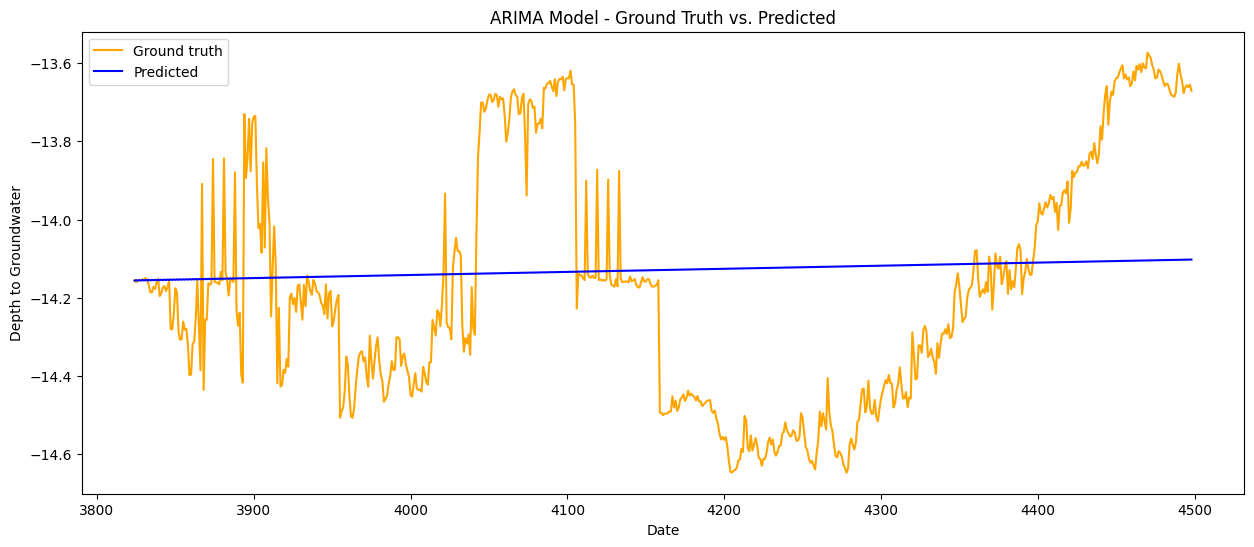

In [31]:
# Generate predictions
forecast_steps = 675


# Create a DataFrame for the predictions
pred_df = pd.DataFrame({'y_pred': y_pred}, index=y_valid.index[:forecast_steps])

# Plotting
f, ax = plt.subplots(1, figsize=(15, 6))
ax.plot(y_valid['y'], label='Ground truth', color='orange')
ax.plot(pred_df['y_pred'], label='Predicted', color='blue')

ax.set_title('ARIMA Model - Ground Truth vs. Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Depth to Groundwater')
ax.legend()
plt.show()


In [32]:
pred_df['y_pred']

3824   -14.156216
3825   -14.154851
3826   -14.156046
3827   -14.154704
3828   -14.155876
          ...    
4494   -14.102561
4495   -14.102479
4496   -14.102402
4497   -14.102321
4498   -14.102244
Name: y_pred, Length: 675, dtype: float64

In [33]:
feature_columns = [
    'Mean_Rainfall',
    'Mean_Temp',
    'Actual_Volume',
    'Actual_Hydrometry',
]
target_column = ['Depth_to_Groundwater_LT2']

train_size = int(0.85 * len(df))

multivariate_df = df[['Date'] + target_column + feature_columns].copy()
multivariate_df.columns = ['ds', 'y'] + feature_columns

train = multivariate_df.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

train.head()

,ds,y,Mean_Rainfall,Mean_Temp,Actual_Volume,Actual_Hydrometry
0,1998-03-05,-14.4808,0.241111,0.0000,-8456.579933,0.319444
1,1998-03-06,-14.4732,3.830000,2.5125,-8072.702231,0.282222
2,1998-03-07,-14.4374,3.425556,4.8000,-7559.036653,0.215000
3,1998-03-08,-14.4984,2.110000,6.3125,-7534.420794,0.223333
4,1998-03-09,-14.4967,2.191111,6.0625,-7529.258569,0.230556


In [34]:
# Train the model
model = Prophet()
model.add_regressor('Mean_Rainfall')
model.add_regressor('Mean_Temp')
model.add_regressor('Actual_Volume')
model.add_regressor('Actual_Hydrometry')

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod0au0n6/zfvb5uim.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod0au0n6/i39o0rgb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88666', 'data', 'file=/tmp/tmpod0au0n6/zfvb5uim.json', 'init=/tmp/tmpod0au0n6/i39o0rgb.json', 'output', 'file=/tmp/tmpod0au0n6/prophet_modelx753jzoj/prophet_model-20240121151007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:10:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:10:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.23844828172452906


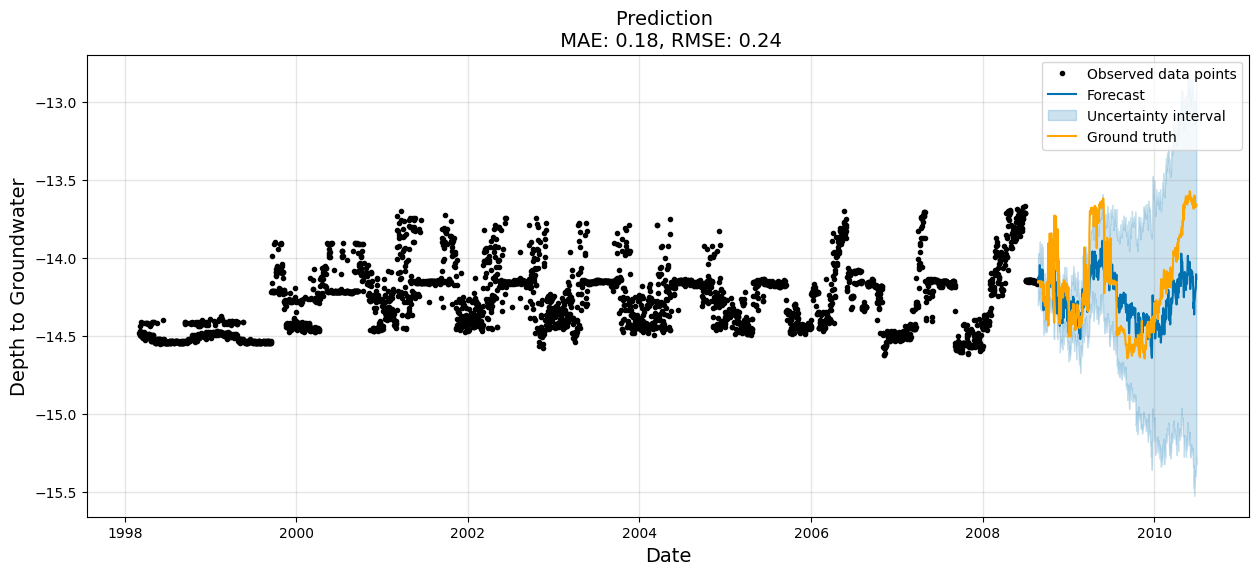

In [35]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()